In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [484]:
df=pd.read_csv("Train_Set.csv")
df

,OrderId,Customer_Id,Customer_Category,Cust_State,Zipcode,Sales,Order_zone,Price,CategoryName,Transcation,...,ProductLength,ProductWeight,Dispatched,Shipping_Class,Scheduled_Shipping,Warehouse_Region,Delivery_Review,Session_Ordered,WeekdayOrder,Delivery_Status
0,2477882,12386,Consumer,AR,19120,150.0,Central,4383.39,Cat-2,UPI,...,191.0,1592.0,0,Standard,4,NORTH,5.0,2.0,0,0
1,2477895,2630,Consumer,BR,2907,165.0,East,4295.72,Cat-2,UPI,...,79.0,1420.0,0,Standard,6,NORTH,2.0,2.0,1,0
2,2473260,1752,Corporate,RJ,90214,171.0,South,3616.65,Cat-50,Cash,...,67.0,1231.0,0,Standard,6,SOUTH,4.0,2.0,0,1
3,2466916,9268,Consumer,UP,745,132.0,East,9175.86,Cat-12,Credit,...,45.0,NaN,1,2A,4,NORTH,4.0,3.0,1,1
4,2351480,2888,Corporate,UP,92427,NaN,North,2779.29,Cat-3,UPI,...,43.0,1018.0,1,Standard,5,CENTRAL,2.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126358,2481424,8723,Corporate,RJ,737,233.0,South,3643.45,Cat-4,UPI,...,81.0,728.0,1,Standard,2,CENTRAL,3.0,1.0,1,0
126359,2467841,9816,Consumer,KA,708,53.0,North,2793.74,Cat-3,Credit,...,86.0,42426.0,0,Standard,4,NE,3.0,3.0,0,0
126360,2512265,9533,others,WB,11450,102.0,North,9334.86,Cat-12,UPI,...,45.0,409.0,0,Standard,4,SOUTH,1.0,2.0,0,0
126361,2464424,5931,Corporate,RJ,738,274.0,South,7133.94,Cat-7,UPI,...,13.0,1690.0,1,2A,4,CENTRAL,3.0,1.0,0,1


In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126363 entries, 0 to 126362
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   OrderId             126363 non-null  int64  
 1   Customer_Id         126363 non-null  int64  
 2   Customer_Category   126363 non-null  object 
 3   Cust_State          126363 non-null  object 
 4   Zipcode             126363 non-null  int64  
 5   Sales               122749 non-null  float64
 6   Order_zone          126363 non-null  object 
 7   Price               126363 non-null  float64
 8   CategoryName        126363 non-null  object 
 9   Transcation         126363 non-null  object 
 10  Dept_Id             126363 non-null  int64  
 11  Dept_Name           126363 non-null  object 
 12  Profit_Ratio        126363 non-null  float64
 13  Discount            121313 non-null  float64
 14  Quantity            126363 non-null  int64  
 15  Order_Profit        126363 non-nul

In [486]:
df['OrderId'].nunique()

126363

In [487]:
df['Customer_Id'].nunique()

16707

In [488]:
[df.groupby('Customer_Id')['Price'].sum().values>30000]

[array([False, False, False, ..., False, False, False])]

In [489]:
df.isnull().sum()

OrderId                  0
Customer_Id              0
Customer_Category        0
Cust_State               0
Zipcode                  0
Sales                 3614
Order_zone               0
Price                    0
CategoryName             0
Transcation              0
Dept_Id                  0
Dept_Name                0
Profit_Ratio             0
Discount              5050
Quantity                 0
Order_Profit             0
Product_type             0
Prod_Category_Id         0
ProductLength         2946
ProductWeight          695
Dispatched               0
Shipping_Class           0
Scheduled_Shipping       0
Warehouse_Region         0
Delivery_Review       9065
Session_Ordered       4792
WeekdayOrder             0
Delivery_Status          0
dtype: int64

In [481]:
df.loc[df['Sales'].isnull(),'Sales']=df['Sales'].median()

In [482]:
df.loc[df['Discount'].isnull(),'Discount']=df['Discount'].mean()
df.loc[df['ProductLength'].isnull(),'ProductLength']=df['ProductLength'].mean()
df.loc[df['ProductWeight'].isnull(),'ProductWeight']=df['ProductWeight'].median()

In [40]:
cols=[]
for i in df.columns:
    if df[i].dtype!='object':
        cols.append(i)
cols

['OrderId',
 'Customer_Id',
 'Zipcode',
 'Sales',
 'Price',
 'Dept_Id',
 'Profit_Ratio',
 'Discount',
 'Quantity',
 'Order_Profit ',
 'Prod_Category_Id',
 'ProductLength',
 'ProductWeight',
 'Dispatched',
 'Scheduled_Shipping',
 'Delivery_Review',
 'Session_Ordered',
 'WeekdayOrder',
 'Delivery_Status']

In [41]:
xcols=[]
for i in df.columns:
    if df[i].dtype=='object':
        xcols.append(i)
xcols

['Customer_Category',
 'Cust_State',
 'Order_zone',
 'CategoryName',
 'Transcation',
 'Dept_Name',
 'Product_type',
 'Shipping_Class',
 'Warehouse_Region']

In [42]:
cols.remove('OrderId')

In [43]:
cols.remove('Dept_Id')
xcols.append('Dept_Id')

In [44]:
cols.remove('Quantity')
xcols.append('Quantity')

In [45]:
cols.remove('Dispatched')
xcols.append('Dispatched')
cols.remove('Scheduled_Shipping')
xcols.append('Scheduled_Shipping')
cols.remove('Delivery_Review')
xcols.append('Delivery_Review')
cols.remove('WeekdayOrder')
xcols.append('WeekdayOrder')
cols.remove('Delivery_Status')
xcols.append('Delivery_Status')
cols.remove('Session_Ordered')
xcols.append('Session_Ordered')

In [46]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df[cat_column].value_counts())
    sns.countplot(x=cat_column, data=df, palette='pastel')
    plt.show()
    print("       ")

Details of Customer_Category
----------------------------------------------------------------
Consumer     65464
Corporate    38360
others       22539
Name: Customer_Category, dtype: int64


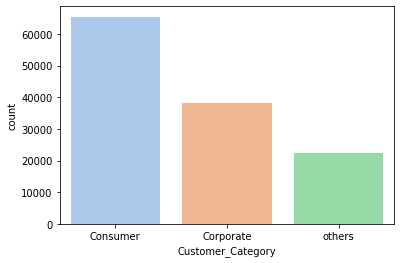

       
Details of Cust_State
----------------------------------------------------------------
AR     7105
RJ     7104
MP     7077
JK     7072
AP     7065
PB     7046
MA     7041
HP     7032
HR     7027
OR     7023
BR     7020
TEL    7000
KL     6980
GJ     6979
UP     6978
KA     6974
WB     6945
UK     6895
Name: Cust_State, dtype: int64


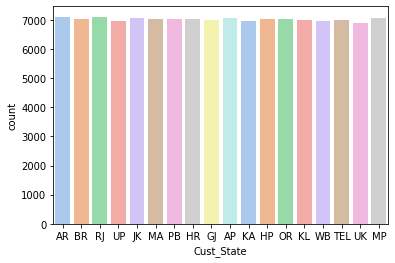

       
Details of Order_zone
----------------------------------------------------------------
North      25375
South      25327
East       25257
Central    25230
West       25174
Name: Order_zone, dtype: int64


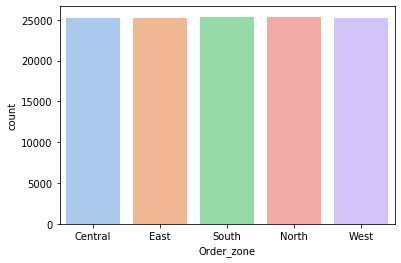

       
Details of CategoryName
----------------------------------------------------------------
Cat-2     17297
Cat-12    15489
Cat-4     14762
Cat-50    13551
Cat-32    12223
Cat-49    10810
Cat-13     9564
Cat-7      8735
Cat-3      7593
Cat-5      2203
Cat-20     1232
Cat-27     1016
Cat-19      854
Cat-42      799
Cat-8       667
Cat-41      609
Cat-11      458
Cat-21      448
Cat-29      447
Cat-37      418
Cat-15      405
Cat-48      375
Cat-44      365
Cat-22      358
Cat-36      345
Cat-38      336
Cat-34      335
Cat-45      317
Cat-10      311
Cat-40      309
Cat-16      305
Cat-6       304
Cat-14      304
Cat-33      272
Cat-1       265
Cat-9       262
Cat-39      243
Cat-30      230
Cat-24      222
Cat-47      202
Cat-35      202
Cat-25      202
Cat-23      152
Cat-31      137
Cat-46      124
Cat-18       92
Cat-28       82
Cat-17       51
Cat-43       41
Cat-26       40
Name: CategoryName, dtype: int64


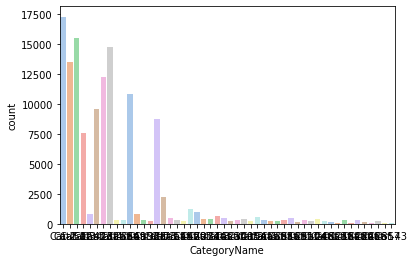

       
Details of Transcation
----------------------------------------------------------------
Debit     48586
UPI       34947
Credit    29113
Cash      13717
Name: Transcation, dtype: int64


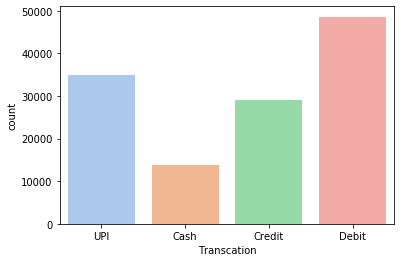

       
Details of Dept_Name
----------------------------------------------------------------
Fan Shop              46834
Apparel               34328
Golf                  23209
Footwear              10142
Outdoors               6794
Fitness                1736
Discs Shop             1455
Technology             1014
Pet Shop                336
Book Shop               272
Health and Beauty       243
Name: Dept_Name, dtype: int64


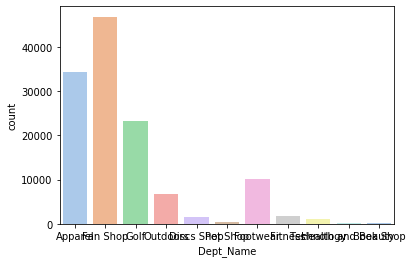

       
Details of Product_type
----------------------------------------------------------------
Not Fragile    71204
Fragile        55159
Name: Product_type, dtype: int64


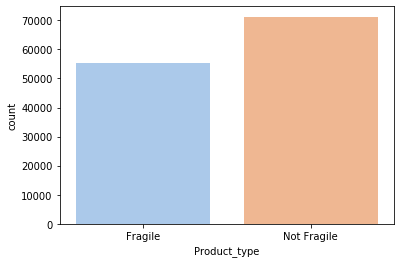

       
Details of Shipping_Class
----------------------------------------------------------------
Standard    75433
2A          24682
1A          19427
Elite        6821
Name: Shipping_Class, dtype: int64


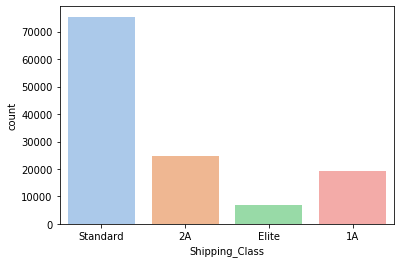

       
Details of Warehouse_Region
----------------------------------------------------------------
NORTH      36043
CENTRAL    35194
SOUTH      28863
WEST       18102
NE          8161
Name: Warehouse_Region, dtype: int64


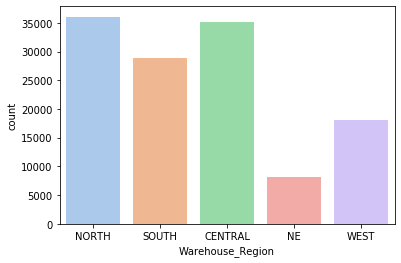

       
Details of Dept_Id
----------------------------------------------------------------
7     46834
4     34328
5     23209
3     10142
6      6794
2      1736
9      1455
10     1014
11      336
8       272
12      243
Name: Dept_Id, dtype: int64


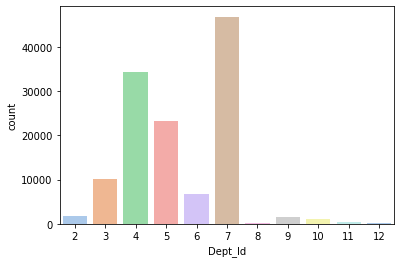

       
Details of Quantity
----------------------------------------------------------------
1    69417
5    14306
4    14304
3    14224
2    14112
Name: Quantity, dtype: int64


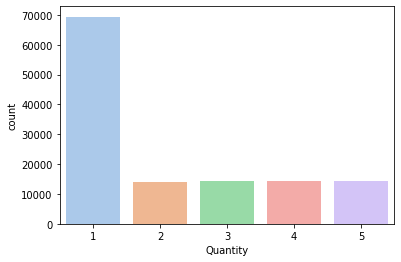

       
Details of Dispatched
----------------------------------------------------------------
0    76543
1    49820
Name: Dispatched, dtype: int64


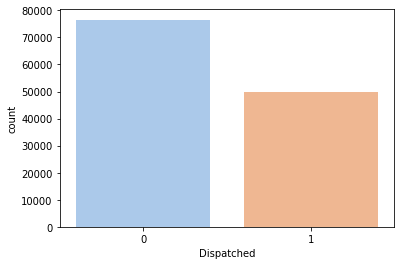

       
Details of Scheduled_Shipping
----------------------------------------------------------------
4    30256
2    27604
3    25045
6    20138
5    19757
0     3563
Name: Scheduled_Shipping, dtype: int64


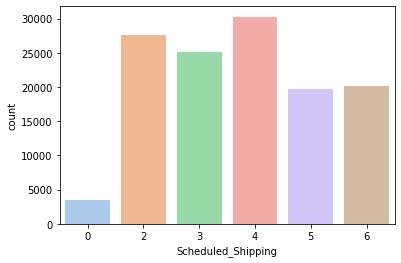

       
Details of Delivery_Review
----------------------------------------------------------------
4.0    42860
3.0    41201
2.0    19732
5.0    11640
1.0     1865
Name: Delivery_Review, dtype: int64


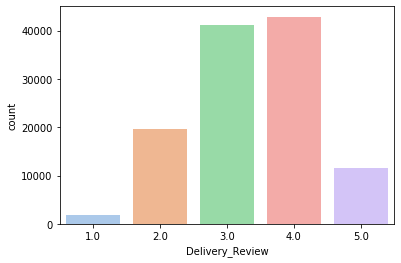

       
Details of WeekdayOrder
----------------------------------------------------------------
0    63444
1    62919
Name: WeekdayOrder, dtype: int64


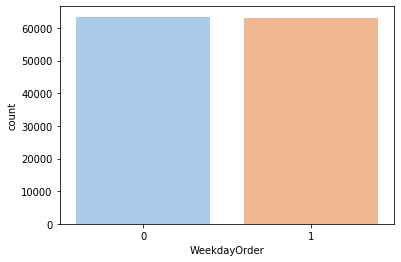

       
Details of Delivery_Status
----------------------------------------------------------------
0    84912
1    41451
Name: Delivery_Status, dtype: int64


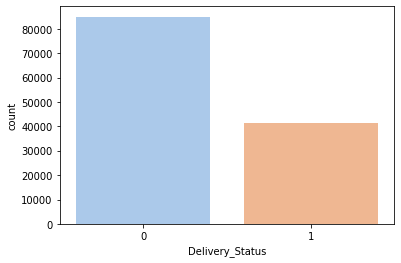

       
Details of Session_Ordered
----------------------------------------------------------------
2.0    40873
3.0    40440
1.0    40258
Name: Session_Ordered, dtype: int64


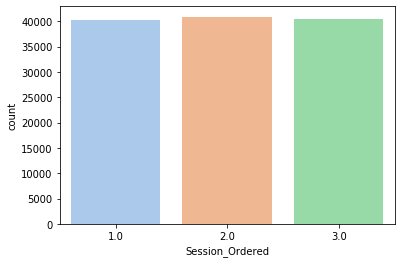

In [47]:
for i in xcols:
    univariateAnalysis_category(i)

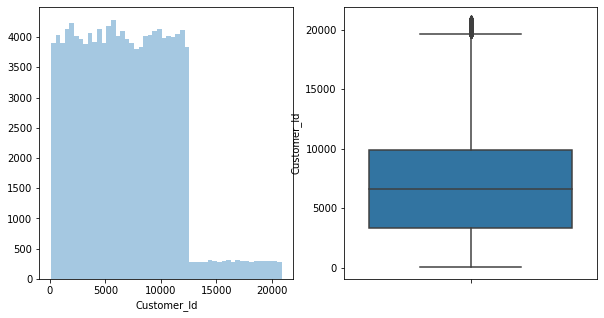

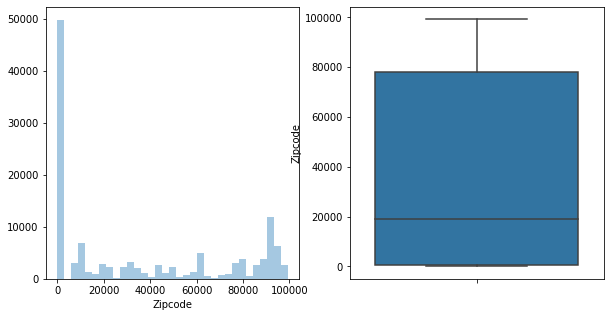

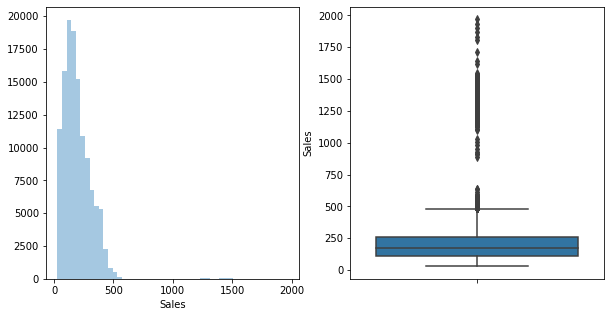

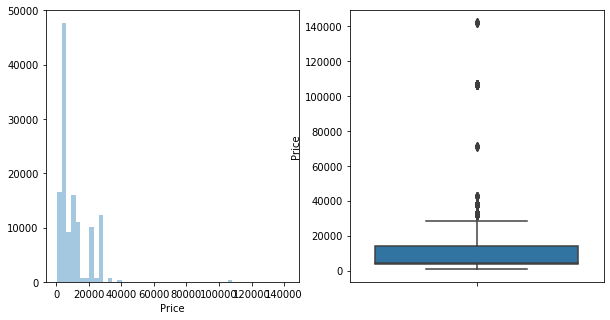

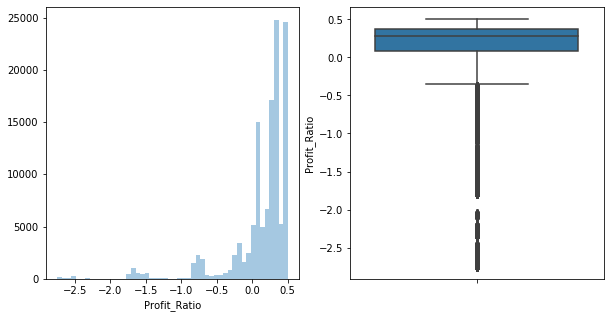

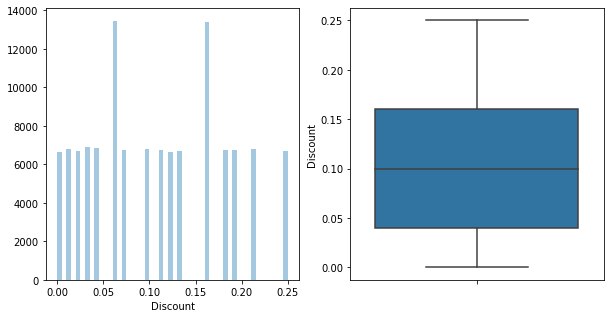

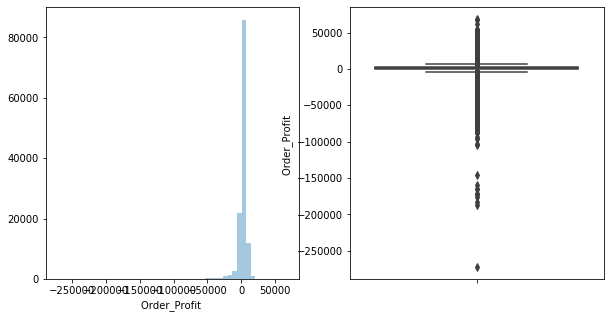

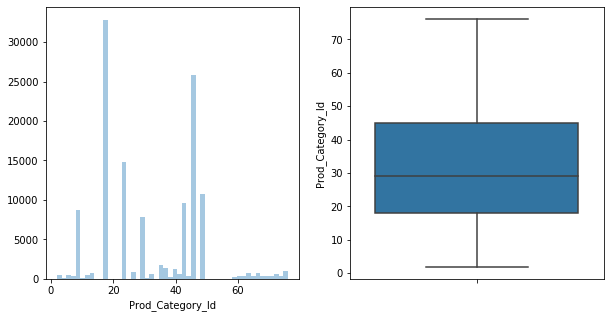

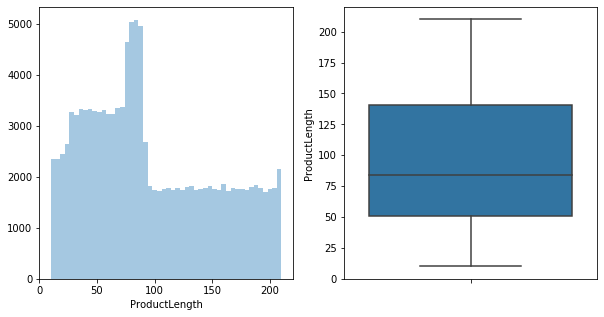

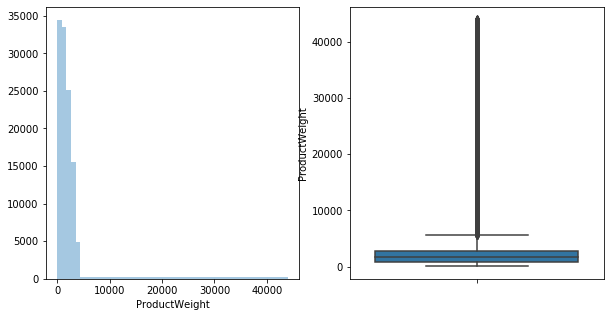

In [48]:
for i in cols:
    fig_dims = (10, 5)
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
    sns.distplot(df[i], kde=False, ax=axs[0])
    sns.boxplot(x= i, data=df, ax=axs[1], orient = 'v') 

In [49]:
df_numeric=df[cols]

In [50]:
df_numeric

,Customer_Id,Zipcode,Sales,Price,Profit_Ratio,Discount,Order_Profit,Prod_Category_Id,ProductLength,ProductWeight
0,12386,19120,150.0,4383.39,0.08,0.10,352.78,17,191.0,1592.0
1,2630,2907,165.0,4295.72,0.47,0.16,2018.10,17,79.0,1420.0
2,1752,90214,171.0,3616.65,0.26,0.07,939.63,46,67.0,1231.0
3,9268,745,132.0,9175.86,0.48,0.18,4401.74,18,45.0,NaN
4,2888,92427,NaN,2779.29,0.13,0.16,361.70,29,43.0,1018.0
...,...,...,...,...,...,...,...,...,...,...
126358,8723,737,233.0,3643.45,0.38,0.04,1384.97,24,81.0,728.0
126359,9816,708,53.0,2793.74,0.31,0.13,866.27,29,86.0,42426.0
126360,9533,11450,102.0,9334.86,0.48,0.06,4479.18,18,45.0,409.0
126361,5931,738,274.0,7133.94,0.11,0.04,785.84,9,13.0,1690.0


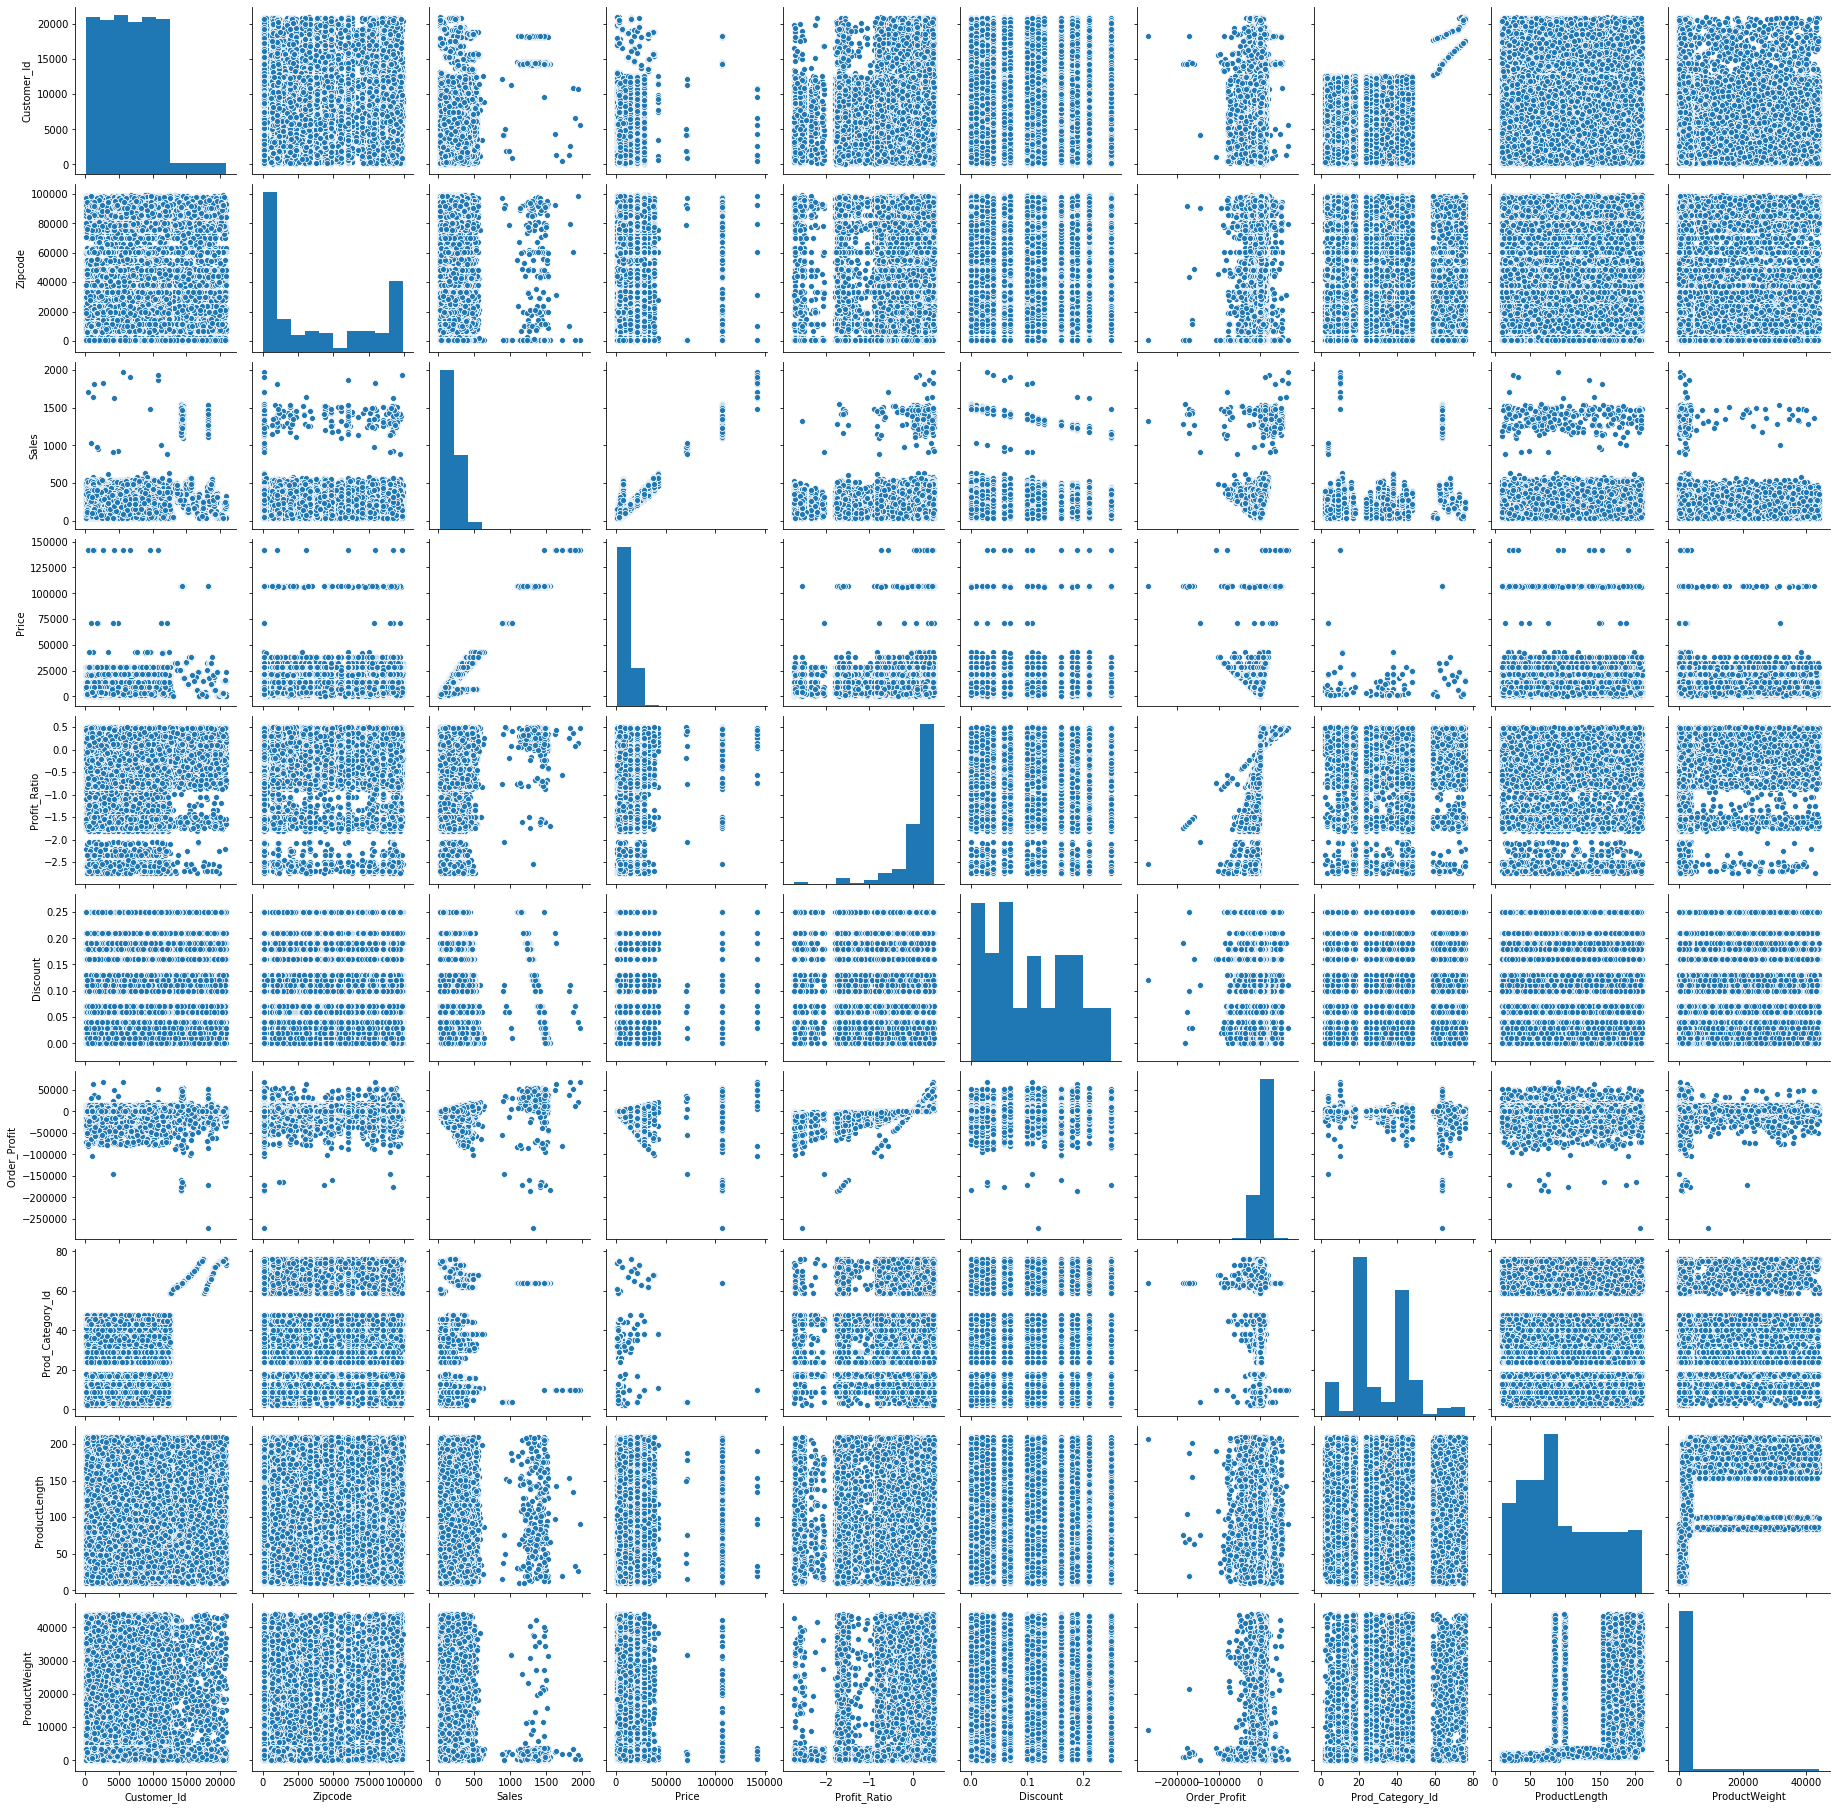

In [52]:
sns.pairplot(df_numeric)

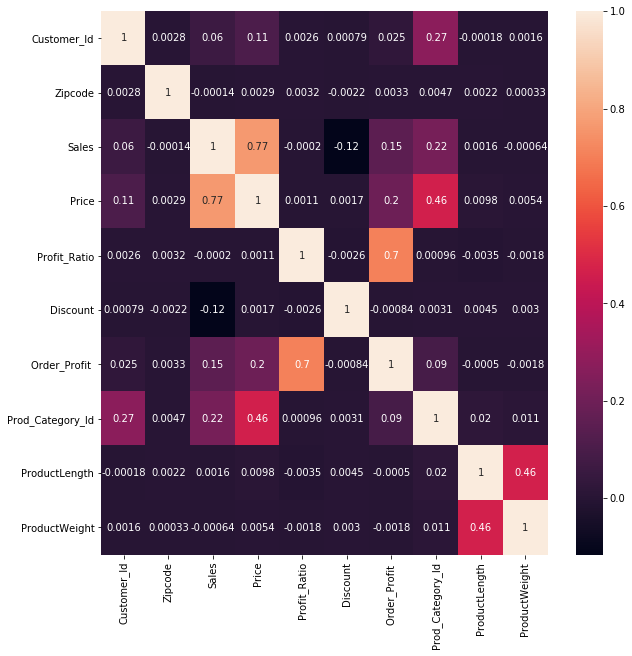

In [59]:
fig_dims=(10,10)
fig=plt.subplots(figsize=fig_dims)
sns.heatmap(df_numeric.corr(),annot=True)

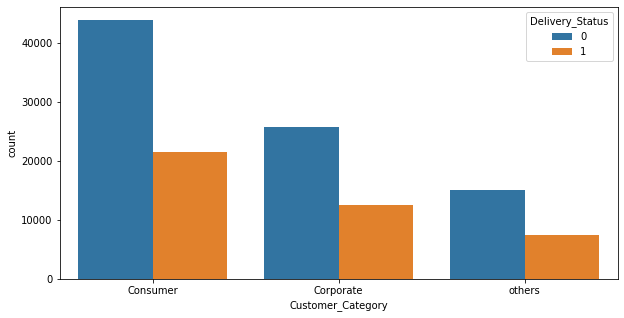

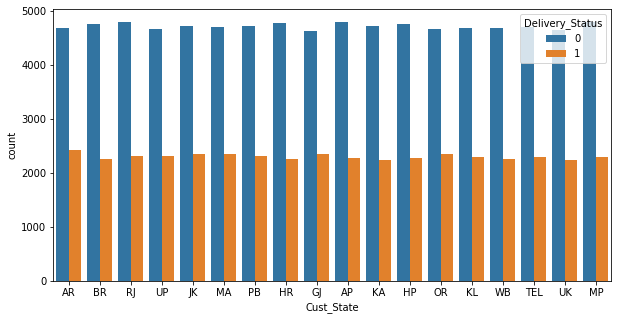

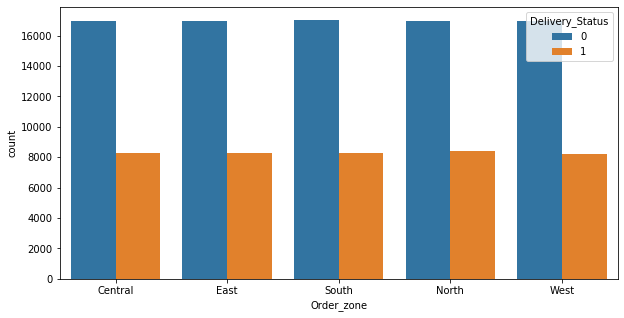

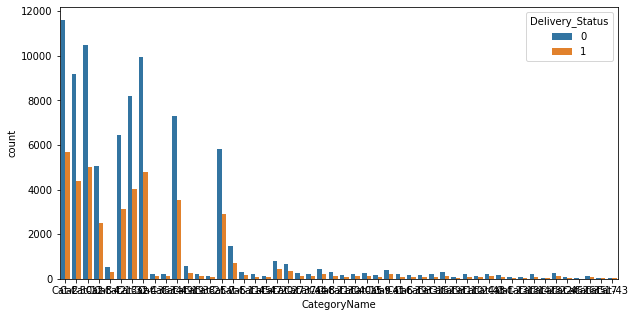

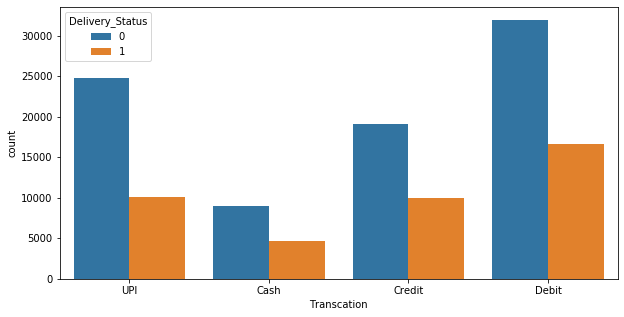

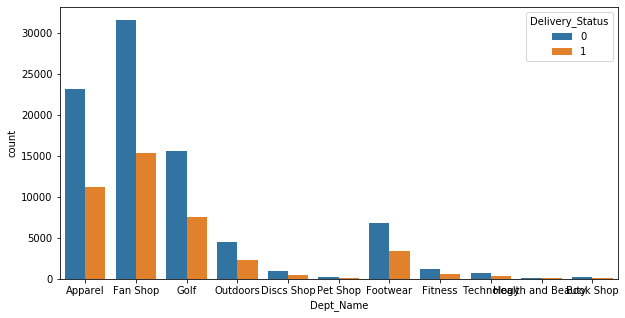

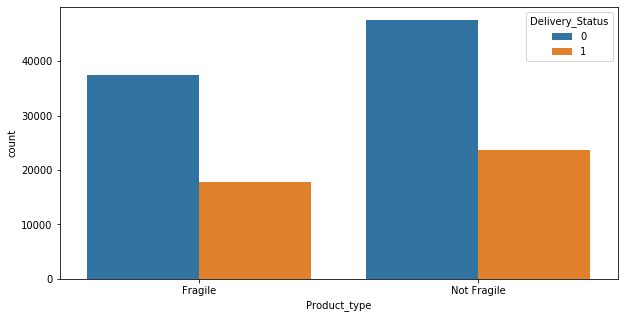

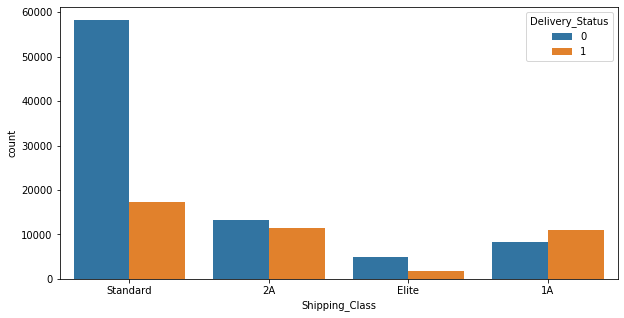

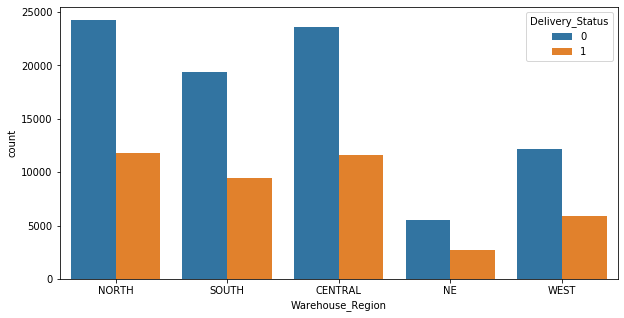

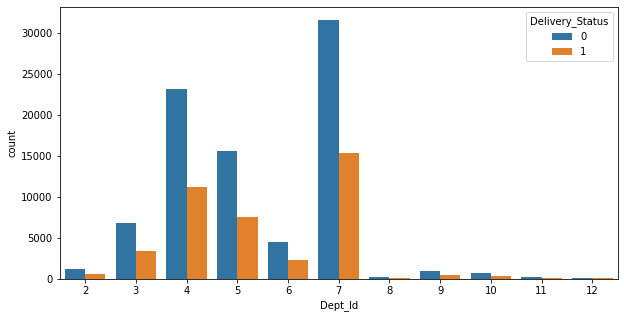

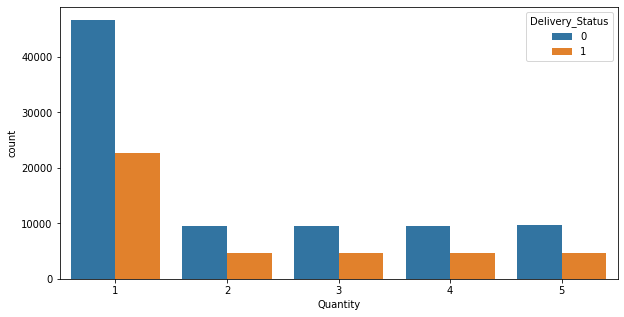

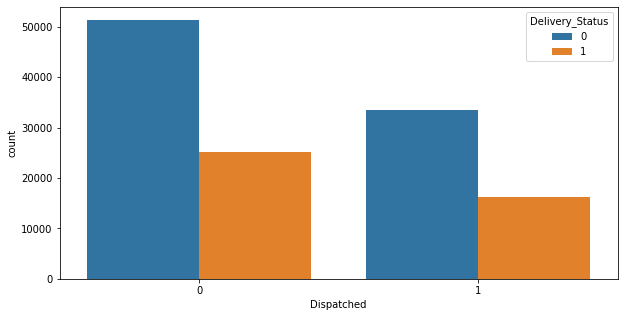

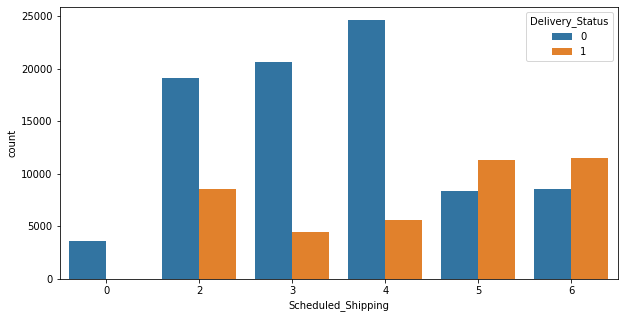

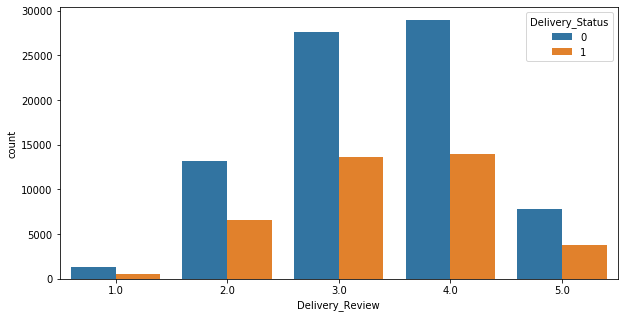

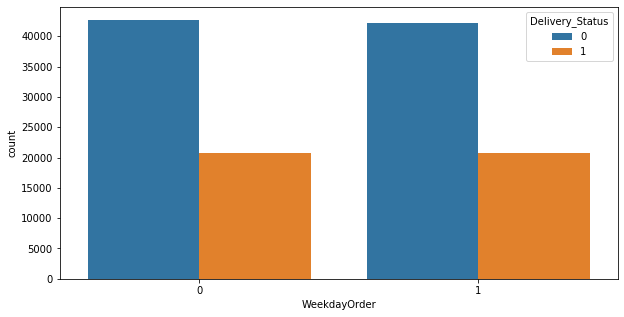

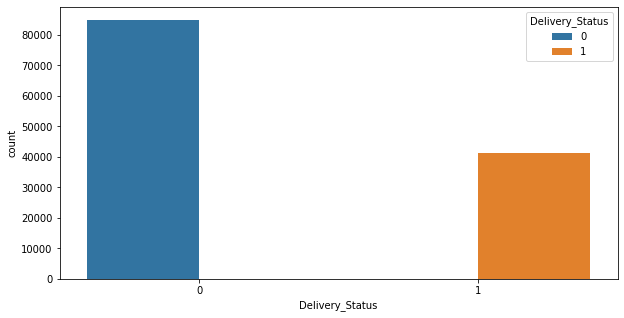

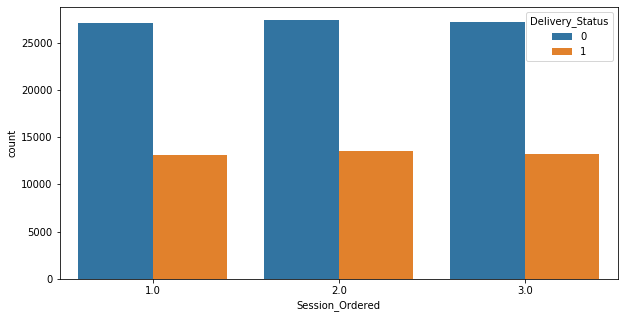

In [60]:
for i in xcols:
    fig_dims = (10, 5)
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=fig_dims)
    sns.countplot(x=i,hue='Delivery_Status',data=df)

In [63]:
cols.remove('Customer_Id')

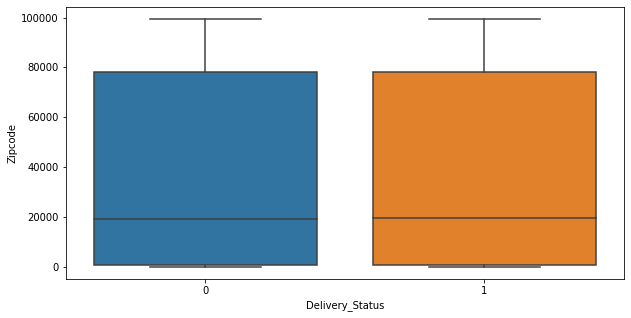

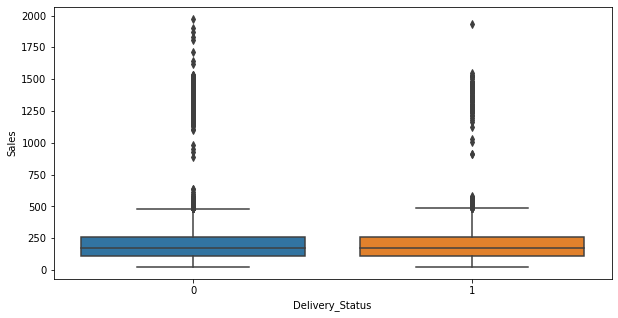

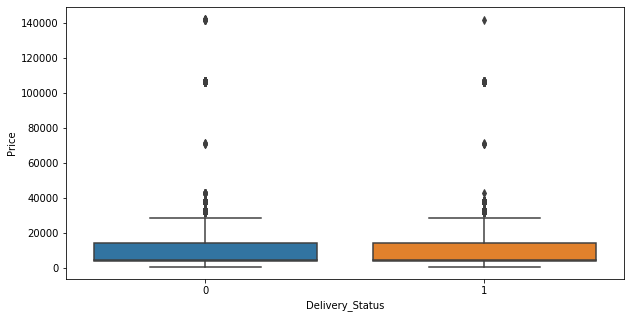

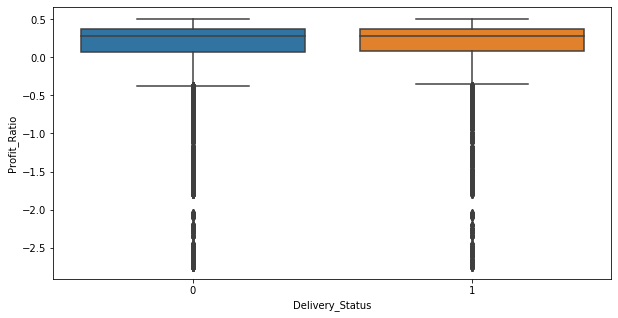

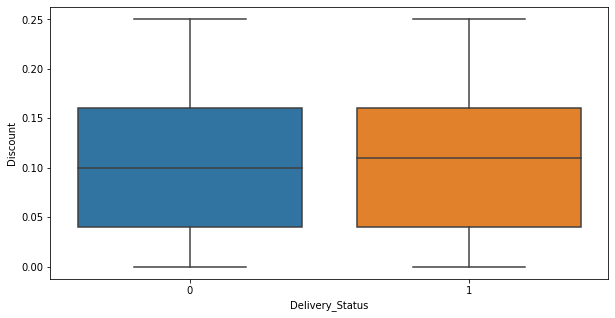

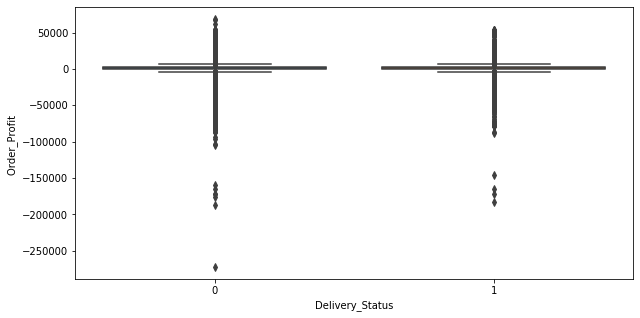

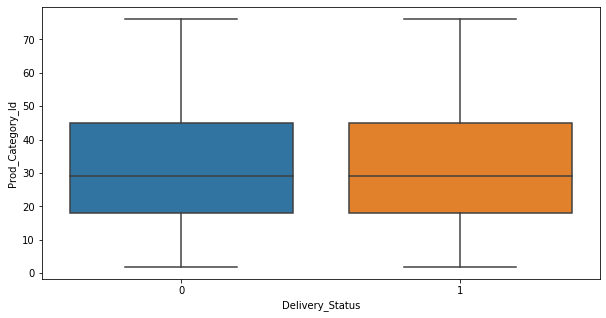

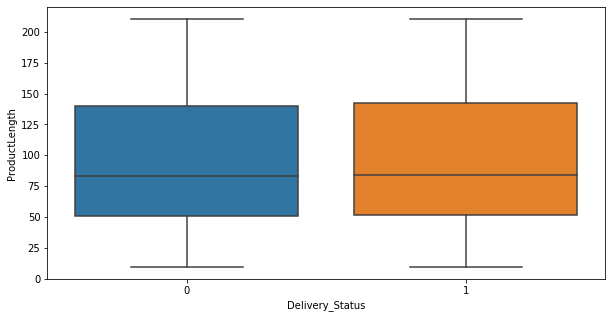

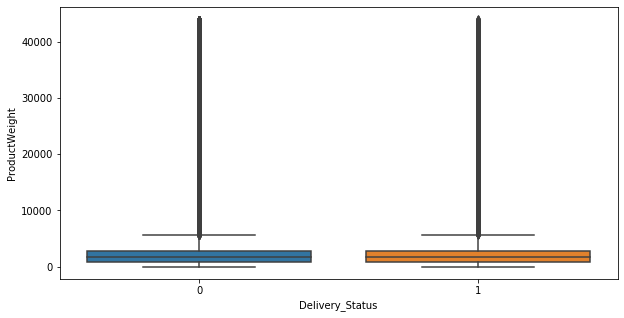

In [65]:
for i in cols:
    fig_dims = (10, 5)
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=fig_dims)
    sns.boxplot(x='Delivery_Status',y=i,data=df)

In [490]:
df.drop(['Customer_Id','OrderId','Zipcode','CategoryName','Dept_Name'],axis=1,inplace=True)

In [491]:
df.loc[:,'AOV']=df.loc[:,'Price']/df.loc[:,'Quantity']

In [492]:
df.loc[df['Order_Profit ']>10000,'PnL']='HP'
df.loc[((df['Order_Profit ']>0) & (df['Order_Profit ']<10000)),'PnL']='P'
df.loc[((df['Order_Profit ']<0) & (df['Order_Profit ']>-10000)),'PnL']='L'
df.loc[df['Order_Profit ']<-10000,'PnL']='HL'

In [493]:
df.loc[:,'D/P']=df.loc[:,'Discount']/df.loc[:,'Price']

In [494]:
df['PnL'].value_counts()

P     97122
L     19512
HP     5600
HL     4129
Name: PnL, dtype: int64

In [495]:
df['Delivery_Status'].value_counts(normalize=True)

0    0.671969
1    0.328031
Name: Delivery_Status, dtype: float64

In [270]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [234]:
from sklearn.model_selection import train_test_split

In [496]:
train, test=train_test_split(df,test_size=0.3,random_state=1,stratify=df['Delivery_Status'])

In [497]:
train

,Customer_Category,Cust_State,Sales,Order_zone,Price,Transcation,Dept_Id,Profit_Ratio,Discount,Quantity,...,Shipping_Class,Scheduled_Shipping,Warehouse_Region,Delivery_Review,Session_Ordered,WeekdayOrder,Delivery_Status,AOV,PnL,D/P
119377,others,AR,120.0,East,9365.27,UPI,4,0.38,0.00,1,...,Standard,2,NORTH,3.0,1.0,0,0,9365.2700,P,0.000000
49519,Corporate,MA,144.0,West,14229.84,Credit,7,-0.10,0.21,1,...,Standard,6,NORTH,3.0,2.0,0,0,14229.8400,L,0.000015
107407,Corporate,JK,273.0,North,21236.72,Cash,7,0.29,0.06,1,...,1A,3,SOUTH,5.0,3.0,1,0,21236.7200,P,0.000003
97366,Corporate,KL,NaN,North,2941.24,Debit,5,-1.65,0.13,1,...,1A,2,NORTH,2.0,1.0,1,0,2941.2400,L,0.000044
63895,Consumer,RJ,404.0,North,7032.75,UPI,3,0.35,0.16,5,...,2A,2,CENTRAL,4.0,2.0,1,0,1406.5500,P,0.000023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45968,others,BR,35.0,East,1355.62,Debit,6,0.32,0.16,2,...,1A,4,NE,3.0,1.0,0,0,677.8100,P,0.000118
124117,Corporate,TEL,142.0,North,9263.00,Debit,4,0.08,0.16,1,...,Standard,4,SOUTH,3.0,2.0,1,0,9263.0000,P,0.000017
94854,Consumer,PB,55.0,Central,3465.93,UPI,7,0.15,0.11,1,...,1A,4,WEST,3.0,1.0,0,0,3465.9300,P,0.000032
103549,Consumer,JK,323.0,West,7189.19,UPI,3,0.38,0.13,4,...,1A,2,NORTH,3.0,2.0,1,1,1797.2975,P,0.000018


In [498]:
X_train=train.drop('Delivery_Status',axis=1)
Y_train=train['Delivery_Status']
X_test=test.drop('Delivery_Status',axis=1)
Y_test=test['Delivery_Status']

In [279]:
for column in X_train.columns:
     if X_train[column].dtype != 'object': 
        lr,ur=remove_outlier(X_train[column])
        X_train[column]=np.where(X_train[column]>ur,ur,X_train[column])
        X_train[column]=np.where(X_train[column]<lr,lr,X_train[column])
        X_test[column]=np.where(X_test[column]>ur,ur,X_test[column])
        X_test[column]=np.where(X_test[column]<lr,lr,X_test[column])

In [277]:
cols.remove('Zipcode')

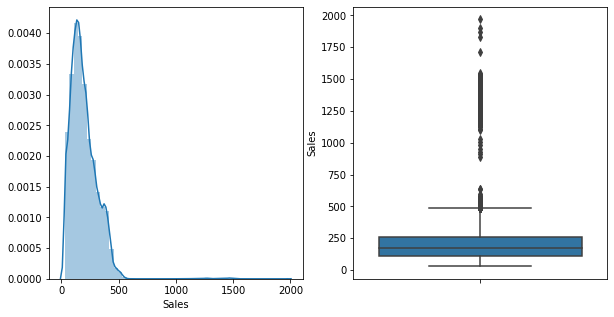

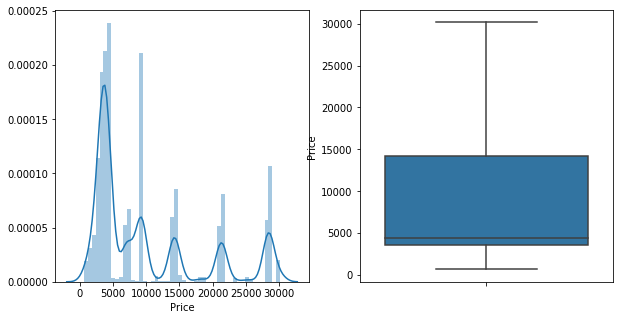

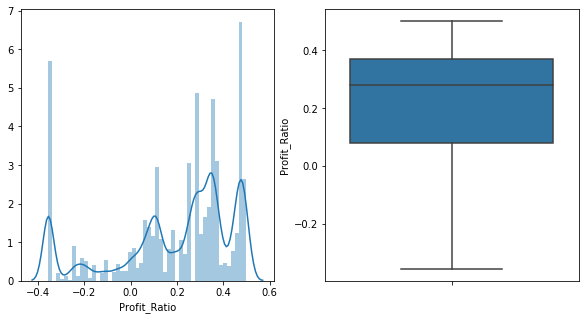

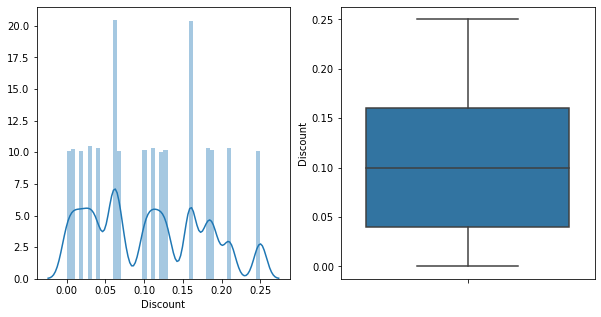

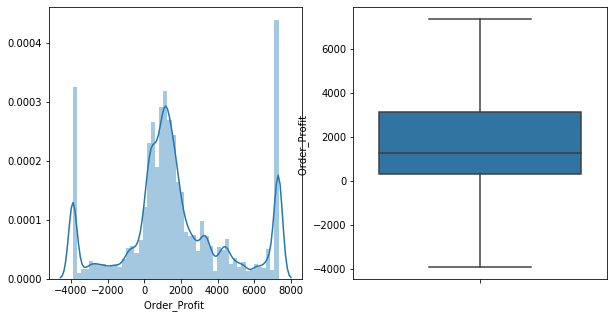

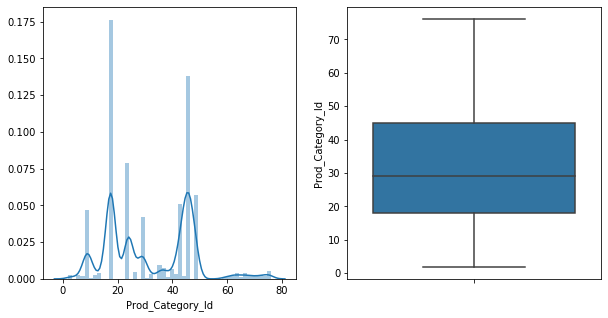

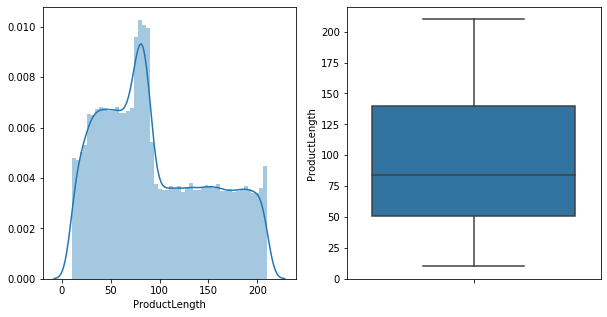

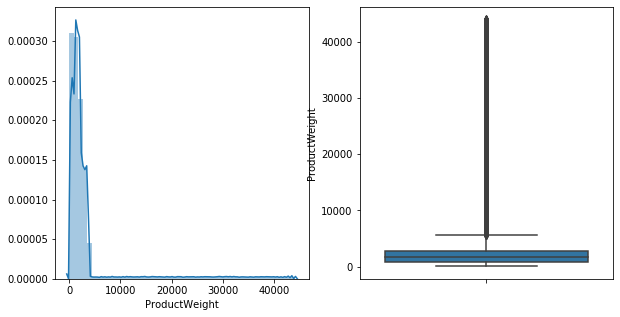

In [278]:
for i in cols:
    fig_dims = (10, 5) 
    fig, axs = plt.subplots(nrows=1, ncols=2,figsize=fig_dims) 
    sns.distplot(X_train[i], kde=True, ax=axs[0]) 
    sns.boxplot(x= i, data=X_train, ax=axs[1],orient="v") 

In [499]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)

In [500]:
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [501]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

0.8227779410767179
[[47255 12183]
 [ 3493 25523]] 

              precision    recall  f1-score   support

           0       0.93      0.80      0.86     59438
           1       0.68      0.88      0.77     29016

    accuracy                           0.82     88454
   macro avg       0.80      0.84      0.81     88454
weighted avg       0.85      0.82      0.83     88454



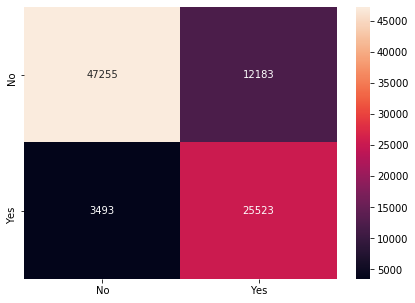

In [502]:
y_predict_train = xgb.predict(X_train)
print(xgb.score(X_train, Y_train))
cm=metrics.confusion_matrix(Y_train, y_predict_train,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


print(metrics.confusion_matrix(Y_train,y_predict_train),'\n')
print(metrics.classification_report(Y_train,y_predict_train))

0.7322271756047377
[[18353  7121]
 [ 3030  9405]] 

              precision    recall  f1-score   support

           0       0.86      0.72      0.78     25474
           1       0.57      0.76      0.65     12435

    accuracy                           0.73     37909
   macro avg       0.71      0.74      0.72     37909
weighted avg       0.76      0.73      0.74     37909



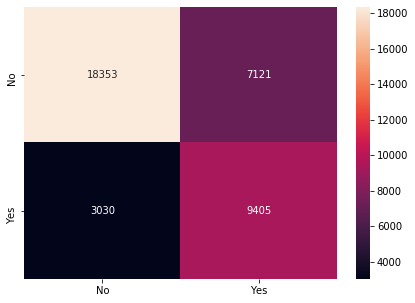

In [503]:
y_predict = xgb.predict(X_test)
print(xgb.score(X_test, Y_test))
cm=metrics.confusion_matrix(Y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


print(metrics.confusion_matrix(Y_test,y_predict),'\n')
print(metrics.classification_report(Y_test,y_predict))

In [504]:
y_test_predict_prob = xgb.predict_proba(X_test)

In [505]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_train=[]#defining an empty list
    for i in range(0,len(y_test_predict_prob[:,1])):#defining a loop
        if y_test_predict_prob[:,1][i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_train.append(a)#adding either 1 or 0 based on the condition to the end of the list
    #defined by us
    print(round(j,3),metrics.accuracy_score(Y_test,custom_cutoff_train))

0.1 0.7377403782742884
0.2 0.7375029676330159
0.3 0.7372127990714606
0.4 0.7367115988287741
0.5 0.7322271756047377
0.6 0.7064021736263156
0.7 0.678783402358279
0.8 0.6733757155292939
0.9 0.6719512516816587


In [450]:
custom_prob = 0.4 #defining the cut-off value of our choice
custom_cutoff_train=[]#defining an empty list
for i in range(0,len(y_test_predict_prob[:,1])):#defining a loop
    if y_test_predict_prob[:,1][i] > custom_prob:#issuing a condition for our probability values to be 
        #greater than the custom cutoff value
        a=1#if the probability values are greater than the custom cutoff then the value should be 1
    else:
        a=0#if the probability values are less than the custom cutoff then the value should be 0
    custom_cutoff_train.append(a)#adding either 1 or 0 based on the condition to the end of the list
    #defined by us

[[16141  9333]
 [  681 11754]] 

True Negative: 16141 
False Positives: 9333 
False Negatives: 681 
True Positives: 11754 

              precision    recall  f1-score   support

           0       0.96      0.63      0.76     25474
           1       0.56      0.95      0.70     12435

    accuracy                           0.74     37909
   macro avg       0.76      0.79      0.73     37909
weighted avg       0.83      0.74      0.74     37909



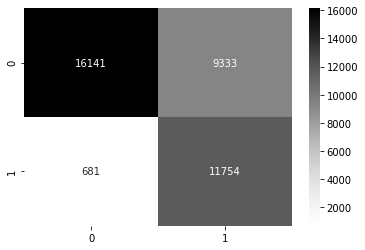

In [451]:
print(metrics.confusion_matrix(Y_test,custom_cutoff_train),'\n')
sns.heatmap((metrics.confusion_matrix(Y_test,custom_cutoff_train)),annot=True,fmt='.5g',cmap='Greys');
tn, fp, fn, tp = metrics.confusion_matrix(Y_test,custom_cutoff_train).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:'
      , fn,'\n''True Positives:', tp,'\n')
print(metrics.classification_report(Y_test,custom_cutoff_train))

In [452]:
print (pd.DataFrame(xgb.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                  Imp
Shipping_Class_Standard      0.645724
Scheduled_Shipping           0.167396
Shipping_Class_2A            0.038867
Transcation_UPI              0.011378
Cust_State_RJ                0.003955
Cust_State_JK                0.003852
PnL_L                        0.003640
Shipping_Class_Elite         0.003481
Quantity                     0.003426
Warehouse_Region_NE          0.003390
Customer_Category_others     0.003382
Cust_State_PB                0.003297
Cust_State_UK                0.003255
AOV                          0.003098
Prod_Category_Id             0.003056
Cust_State_MP                0.003052
Cust_State_KL                0.003034
Cust_State_AR                0.002977
Cust_State_GJ                0.002937
Warehouse_Region_WEST        0.002859
Price                        0.002827
Order_Profit                 0.002805
ProductWeight                0.002802
Profit_Ratio                 0.002763
WeekdayOrder                 0.002761
Cust_State_W

In [467]:
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": [301],
    
    #"scale_pos_weight":[0],
    #"learning_rate":[0.01],
    #"subsample":[0.9],
    #"colsample_bytree":[0.7],
    #"colsample_bylevel":[0.9],
    "max_depth":[4]
}

# Type of scoring used to compare parameter combinations
#acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

In [468]:
xgb_tuned.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=301, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [469]:
train_xgb = xgb_tuned.predict(X_train)
test_xgb = xgb_tuned.predict(X_test)

0.8173287810613427
[[47087 12351]
 [ 3807 25209]] 

              precision    recall  f1-score   support

           0       0.93      0.79      0.85     59438
           1       0.67      0.87      0.76     29016

    accuracy                           0.82     88454
   macro avg       0.80      0.83      0.81     88454
weighted avg       0.84      0.82      0.82     88454



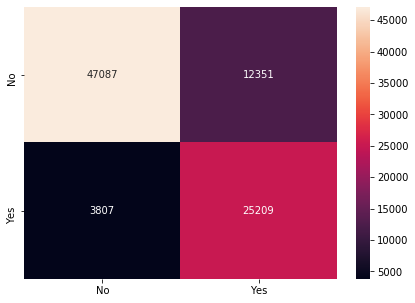

In [470]:
print(xgb_tuned.score(X_train, Y_train))
cm=metrics.confusion_matrix(Y_train, train_xgb,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


print(metrics.confusion_matrix(Y_train,train_xgb),'\n')
print(metrics.classification_report(Y_train,train_xgb))

0.7319897649634651
[[18463  7011]
 [ 3149  9286]] 

              precision    recall  f1-score   support

           0       0.85      0.72      0.78     25474
           1       0.57      0.75      0.65     12435

    accuracy                           0.73     37909
   macro avg       0.71      0.74      0.72     37909
weighted avg       0.76      0.73      0.74     37909



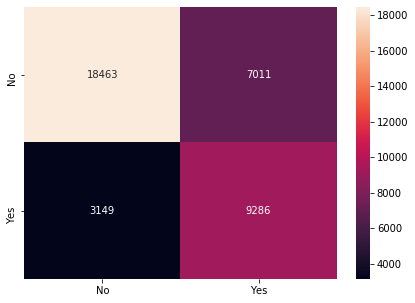

In [471]:

print(xgb_tuned.score(X_test, Y_test))
cm=metrics.confusion_matrix(Y_test, test_xgb,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


print(metrics.confusion_matrix(Y_test,test_xgb),'\n')
print(metrics.classification_report(Y_test,test_xgb))

In [453]:
df_test=pd.read_csv("Test_Set.csv")
df_test

,OrderId,Customer_Id,Customer_Category,Cust_State,Zipcode,Sales,Order_zone,Price,CategoryName,Transcation,...,Prod_Category_Id,ProductLength,ProductWeight,Dispatched,Shipping_Class,Scheduled_Shipping,Warehouse_Region,Delivery_Review,Session_Ordered,WeekdayOrder
0,2372881,2989,others,HR,735,NaN,West,2833.08,Cat-3,UPI,...,29,25.0,1720.0,0,Standard,6,NORTH,5.0,2.0,1
1,2445349,5359,Consumer,MA,737,222.0,Central,14133.42,Cat-49,Debit,...,48,29.0,964.0,1,Standard,4,CENTRAL,3.0,3.0,0
2,2441537,4111,Corporate,GJ,91350,149.0,East,3545.31,Cat-50,Credit,...,46,121.0,2994.0,0,Standard,6,WEST,3.0,1.0,1
3,2461867,5377,Consumer,RJ,77860,162.0,North,9234.05,Cat-12,UPI,...,18,156.0,1008.0,0,Standard,5,CENTRAL,3.0,3.0,1
4,2461659,10563,Consumer,WB,47922,115.0,North,9174.76,Cat-12,UPI,...,18,114.0,1354.0,0,Standard,2,NE,3.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54151,2514090,360,Consumer,RJ,806,192.0,East,4231.28,Cat-2,Cash,...,17,74.0,367.0,1,1A,2,CENTRAL,2.0,1.0,0
54152,2495221,7351,Corporate,RJ,745,337.0,South,28398.02,Cat-32,Debit,...,45,97.0,2832.0,1,2A,3,SOUTH,5.0,1.0,1
54153,2431788,10610,Corporate,HR,740,89.0,East,1491.44,Cat-27,Credit,...,36,202.0,3601.0,0,2A,5,NORTH,2.0,3.0,0
54154,2385761,18063,Consumer,MP,88015,332.0,South,25355.01,Cat-29,Debit,...,63,60.0,144.0,0,Elite,2,SOUTH,NaN,2.0,0


In [454]:
df_test1=df_test.copy()

In [483]:
df_test.isnull().sum()

OrderId                  0
Customer_Id              0
Customer_Category        0
Cust_State               0
Zipcode                  0
Sales                 1460
Order_zone               0
Price                    0
CategoryName             0
Transcation              0
Dept_Id                  0
Dept_Name                0
Profit_Ratio             0
Discount              2174
Quantity                 0
Order_Profit             0
Product_type             0
Prod_Category_Id         0
ProductLength         1304
ProductWeight          307
Dispatched               0
Shipping_Class           0
Scheduled_Shipping       0
Warehouse_Region         0
Delivery_Review       3896
Session_Ordered       2031
WeekdayOrder             0
Delivery_Status          0
dtype: int64

In [481]:
df_test1.loc[df_test1['Sales'].isnull(),'Sales']=df['Sales'].median()

In [482]:
df_test1.loc[df_test1['Discount'].isnull(),'Discount']=df['Discount'].mean()
df_test1.loc[df_test1['ProductLength'].isnull(),'ProductLength']=df['ProductLength'].mean()
df_test1.loc[df_test1['ProductWeight'].isnull(),'ProductWeight']=df['ProductWeight'].median()

In [455]:
df_test1.loc[:,'AOV']=df_test1.loc[:,'Price']/df_test1.loc[:,'Quantity']

In [456]:
df_test1.loc[:,'D/P']=df_test1.loc[:,'Discount']/df_test1.loc[:,'Price']

In [457]:
df_test1.loc[df_test1['Order_Profit ']>10000,'PnL']='HP'
df_test1.loc[((df_test1['Order_Profit ']>0) & (df_test1['Order_Profit ']<10000)),'PnL']='P'
df_test1.loc[((df_test1['Order_Profit ']<0) & (df_test1['Order_Profit ']>-10000)),'PnL']='L'
df_test1.loc[df_test1['Order_Profit ']<-10000,'PnL']='HL'

In [300]:
for column in df_test1.columns:
     if df_test1[column].dtype != 'object': 
        lr,ur=remove_outlier(X_train[column])
        df_test1[column]=np.where(df_test1[column]>ur,ur,df_test1[column])
        df_test1[column]=np.where(df_test1[column]<lr,lr,df_test1[column])
        

In [458]:
df_test1.drop(['OrderId','Customer_Id','Zipcode','CategoryName','Dept_Name'],axis=1,inplace=True)

In [459]:
df_test1=pd.get_dummies(df_test1,drop_first=True)

In [460]:
test_predict= xgb.predict(df_test1)

In [462]:
test_predict_prob = xgb.predict_proba(df_test1)

In [472]:
test_predict_xgb= xgb_tuned.predict(df_test1)

In [473]:
test_predict_prob = xgb_tuned.predict_proba(df_test1)

In [474]:
custom_prob = 0.25#defining the cut-off value of our choice
custom_cutoff_train=[]#defining an empty list
for i in range(0,len(test_predict_prob[:,1])):#defining a loop
    if test_predict_prob[:,1][i] > custom_prob:#issuing a condition for our probability values to be 
        #greater than the custom cutoff value
        a=1#if the probability values are greater than the custom cutoff then the value should be 1
    else:
        a=0#if the probability values are less than the custom cutoff then the value should be 0
    custom_cutoff_train.append(a)#adding either 1 or 0 based on the condition to the end of the list
    #defined by us

In [475]:
df_test['Delivery_Status']=custom_cutoff_train

In [476]:
predict=df_test[['OrderId','Delivery_Status']]

In [477]:
predict.to_csv("result.csv",index=False)